In [1]:
##Overview
##
##Input:  yelp file business.json
##output: ouryelpbusinesses.csv
##filter: business in top n categories (5 was selected)
##filter: only businesses in NV and AZ
    

## Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import types
import re
#import ijson

import os
from datetime import datetime

%matplotlib inline
##

datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2019-05-23 05:58:42'

In [2]:
# !pip install pyspark

In [3]:
# !pip install ijson

In [4]:
#setup environment
import os
cwd = os.getcwd()
print("Current Working Directory " , cwd)
os.chdir("C:/Users/Richpat/Documents/@syracuse coursework/@IST 718 Big Data Analytics (Python)/finalproject")
print('\nFiles in directory', os.listdir())
print('\n')
pd.show_versions(as_json=True) # True to shorten/flatten output
print ('\nStart date/time', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Current Working Directory  c:\Users\Richpat\Documents\@syracuse coursework\@IST 718 Big Data Analytics (Python)\finalproject

Files in directory ['.ipynb_checkpoints', '2016_Historical_Business_File_Layout.xlsx', 'b.2.1_41473_project_checkpoint_1_clean.pdf', 'bCatTall.csv', 'business.json', 'BusinessCategoryCount.csv', 'checkin.json', 'Dataset_Challenge_Dataset_Agreement.pdf', 'DBHArizona164RestaurantsHighRisk.csv', 'DBHArizona164RestaurantsLowGT9.csv', 'DBHArizona164RestaurantsLowLT10.csv', 'DBHArizona164RestaurantsMediumGT6.csv', 'DBHArizona164RestaurantsMediumLT7.csv', 'DBHArizona164RestaurantsNARisk.csv', 'DBHNevada164RestaurantsHighRisk.csv', 'DBHNevada164RestaurantsLowRisk.csv', 'DBHNevada164RestaurantsMediumRisk.csv', 'DBHNevada164RestaurantsNARisk.csv', 'DBHRestaurants.csv', 'DRT_IST718_FinalProject_concatDBH.rmd', 'DRT_IST718_FinalProject_ReadJSON.rmd', 'DRT_Thinking_draft.pptx', 'MakeOurYelpBusinesses.ipynb', 'ourbusinesses.csv', 'ourreviews.csv', 'Paterson_.Week5ProjectCheck

In [5]:
def readJSONreturnLIST (fn, verbosity):

    print ('Start readJSONreturnLIST for ', fn, 'at date/time', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with open(fn, encoding='utf-8') as json_file:      
        data = json_file.readlines()
        # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
        data = list(map(json.loads, data)) 
        
    print ('Type data', type(data), 'len data', len(data))
        
    print ('Start readJSONreturnLIST date/time', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

    return (data)

In [6]:
# read in full business.json files (excluding review.json - see later for that)

print ('Start date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
businesses=readJSONreturnLIST ('business.json', 2)
print ('End date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Start date/time: 2019-05-23 05:58:45
Start readJSONreturnLIST for  business.json at date/time 2019-05-23 05:58:45
Type data <class 'list'> len data 192609
Start readJSONreturnLIST date/time 2019-05-23 05:58:48
End date/time: 2019-05-23 05:58:48


In [7]:
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
rNoBusinessesCnt=0
print ('Sample of business data')
print ('=======================')
for business in businesses:
    if rNoBusinessesCnt==0:
        print (business)
        print ('Business ID', business['business_id'])
        print (json.dumps(business, indent=4))
    rNoBusinessesCnt+=1
print('Number of businesses counted:', rNoBusinessesCnt)
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Date/time: 2019-05-23 05:58:48
Sample of business data
{'business_id': '1SWheh84yJXfytovILXOAQ', 'name': 'Arizona Biltmore Golf Club', 'address': '2818 E Camino Acequia Drive', 'city': 'Phoenix', 'state': 'AZ', 'postal_code': '85016', 'latitude': 33.5221425, 'longitude': -112.0184807, 'stars': 3.0, 'review_count': 5, 'is_open': 0, 'attributes': {'GoodForKids': 'False'}, 'categories': 'Golf, Active Life', 'hours': None}
Business ID 1SWheh84yJXfytovILXOAQ
{
    "business_id": "1SWheh84yJXfytovILXOAQ",
    "name": "Arizona Biltmore Golf Club",
    "address": "2818 E Camino Acequia Drive",
    "city": "Phoenix",
    "state": "AZ",
    "postal_code": "85016",
    "latitude": 33.5221425,
    "longitude": -112.0184807,
    "stars": 3.0,
    "review_count": 5,
    "is_open": 0,
    "attributes": {
        "GoodForKids": "False"
    },
    "categories": "Golf, Active Life",
    "hours": null
}
Number of businesses counted: 192609
Date/time: 2019-05-23 05:58:48


In [8]:
#convert BUSINESS to DF
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
businessDF=pd.DataFrame(businesses)
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Date/time: 2019-05-23 05:58:48
Date/time: 2019-05-23 05:58:49


Chart count of business by state
Date/time: 2019-05-23 05:58:49


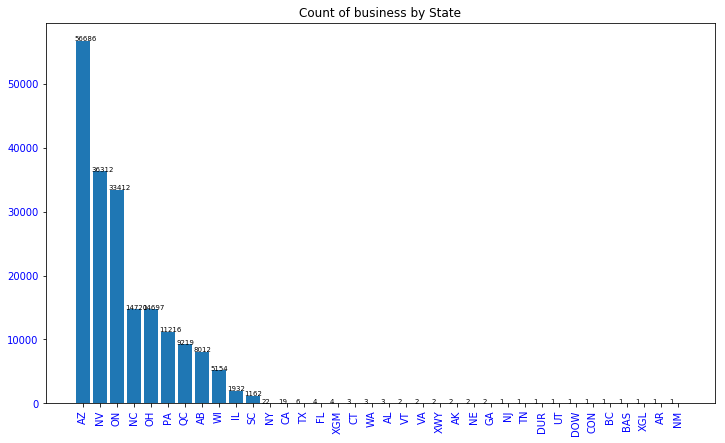

Date/time: 2019-05-23 05:58:50


In [9]:
# https://python-graph-gallery.com/10-barplot-with-number-of-observation/
#Chart how many businesses are in each state

print ("Chart count of business by state")
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

#prep data for charting
bState=pd.DataFrame(businessDF.groupby('state').count()['address'])
bState.rename(columns={'address':'count'}, inplace=True)
bState=bState.sort_values('count', ascending=False)
bState['state']=bState.index.astype(str)
bState['Label'] = bState['state']

#prep labels
bars=bState['Label']
y_pos = np.arange(len(bars))
height = round(bState['count'], 1) #show 3 decimals if we are choosing the top 20

#bars
plt.bar(y_pos, height)

#xlabels, ylabels, title
plt.xticks(y_pos, bars, color='blue', rotation=90)
plt.yticks(color='blue')
plt.title('Count of business by State')

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = (i)-0.5 , y = height[i]+0.1, s = str(height[i]) , size = 7)
    
#width of display 
fig = plt.gcf()
fig.set_size_inches( 12, 7)

# Show graphic
plt.show()
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

In [10]:
print ("\nBusiness category data sample pre-transformation")
print (businessDF['categories'].head(2))

#process 1: split categories into individual columns
NC=40
businessDF['categories']=businessDF.categories.str.lower()
bCategories=businessDF.categories.str.split(',', n=NC, expand=True)

#process 2: summarise each columns by category and count number of occurrence
NC=bCategories.shape[1] #reduce number of columns if necessary
NR=bCategories.shape[0] #number rows
bCatTall=pd.DataFrame({"CatCnt":[0]})
bCatTall = bCatTall.drop(bCatTall.index[0])
cntNull=0
for i in range(NC):
    cntNull=cntNull+bCategories[i].isnull().sum()
    bCatTmp=pd.DataFrame(bCategories.groupby(i)[i].count())
    bCatTmp.columns = ['CatCnt']
    bCatTall=bCatTall.append(bCatTmp)

#process 3: summarise tall category df by unique category
bCatTall.index=bCatTall.index.str.strip()
bCatTall=bCatTall.groupby(bCatTall.index).sum()

print ("\nThe total number of cells across all the business categories, post split is", NR*NC)
print ("\nThe total number of NULL cells across all the business categories, post split is", cntNull)
print ("\nThe total number of categories counted across all the business categories, post split is", bCatTall['CatCnt'].sum())

bCatTall=bCatTall.sort_values('CatCnt', ascending=False)
bCatTall.to_csv('bCatTall.csv', header='column_names',encoding='utf-8')


Business category data sample pre-transformation
0                                    Golf, Active Life
1    Specialty Food, Restaurants, Dim Sum, Imported...
Name: categories, dtype: object

The total number of cells across all the business categories, post split is 7126533

The total number of NULL cells across all the business categories, post split is 6338174

The total number of categories counted across all the business categories, post split is 788359


Count of Businesses in Category   (1300, 1)
Date/time: 2019-05-23 05:58:53


C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


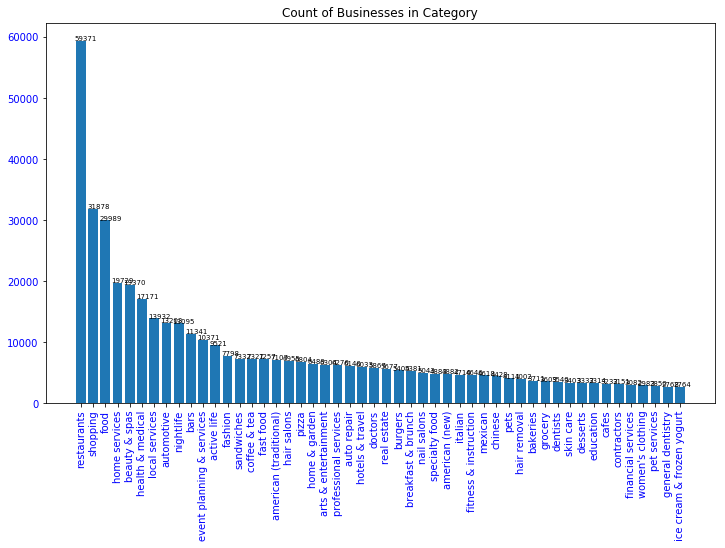

Date/time: 2019-05-23 05:58:54


In [11]:
# https://python-graph-gallery.com/10-barplot-with-number-of-observation/
# This routine provides for standardized input
#     rows and columns
#     rows are individual bars that will be reported
#     columns are: (1) index column with label (2) value that must be reported
#

PltMX=bCatTall
PltToShow=50
PltTitle='Count of Businesses in Category'

print (PltTitle, ' ', PltMX.shape)
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

#set PltMX (plot matrix) as input values; assumes input is in correct order
PltMX=PltMX.head(PltToShow)

#PltMX.columns = ['Count']
PltMX['Group']=PltMX.index.astype(str) #use index as plot label
PltMX['Label']=PltMX['Group']

#prep labels
bars=PltMX['Label']
y_pos = np.arange(len(bars))
height = round(PltMX['CatCnt'], 1) #show 3 decimals if we are choosing the top 20

#bars
plt.bar(y_pos, height)


#xlabels, ylabels, title
plt.xticks(y_pos, bars, color='blue', rotation=90)
plt.yticks(color='blue')
plt.title(PltTitle)

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = (i)-0.5 , y = height[i]+0.1, s = str(height[i]) , size = 7)
    
#width of display 
fig = plt.gcf()
fig.set_size_inches( 12, 7)

# Show graphic
plt.show()
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

In [12]:
#REDUCE businesses - select businesses in the top n categories
#
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
#pull out and create grep string for top n categories
categoriesOFinterest=''
numberOFcategories=5
for x in range(numberOFcategories):
    if x>0:
        categoriesOFinterest=categoriesOFinterest+'|'
    categoriesOFinterest=categoriesOFinterest + "^" + bCatTall.index[x]
#bC=bCategories
#categoriesOFinterest='^restaurants|^shopping|^food'
#print(categoriesOFinterest)
bIX=bCategories.apply(lambda row: row.astype(str).str.contains(categoriesOFinterest).any(), axis=1)
OurBusinessDF=businessDF[(bIX==True)]
OurbCategories=bCategories[(bIX==True)]
print ('\nNumber of businesses selected where categories of interest are in ', categoriesOFinterest, ' is', OurBusinessDF.shape[0])
print ('\nNumber of businesses categories split out that are selected are', OurbCategories.shape[0])
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Date/time: 2019-05-23 05:58:54

Number of businesses selected where categories of interest are in  ^restaurants|^shopping|^food|^home services|^beauty & spas  is 45567

Number of businesses categories split out that are selected are 45567
Date/time: 2019-05-23 05:59:53


In [13]:
#Continue REDUCE businesses - select businesses in two states NV and AZ
#
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
bIX=((OurBusinessDF['state'] =='AZ') | (OurBusinessDF['state'] =='NV'))
OurBusinessDF=OurBusinessDF[bIX==True]
OurbCategories=OurbCategories[bIX==True]
print ("\nNumber of AZ and NV business selected", OurBusinessDF.shape[0])
print ("\nNumber of AZ and NV categories selected", OurbCategories.shape[0])
#tmp2=OurBusinessDF[((OurBusinessDF['state'] =='AZ') | (OurBusinessDF['state'] =='NV'))]
#OurBusinessDF=OurBusinessDF[((OurBusinessDF['state'] =='AZ') | (OurBusinessDF['state'] =='NV'))]
#print ("\nNumber of AZ and NV restaurants selected", tmp2.shape[0])
#print (businessDFsel.head(10))
print ('Date/time:', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Date/time: 2019-05-23 05:59:53

Number of AZ and NV business selected 19122

Number of AZ and NV categories selected 19122
Date/time: 2019-05-23 05:59:53


In [14]:
#ENRICH businesses - identify (by column) which business is in which category
#
for x in range(numberOFcategories):
#for x in range(1):
    categoryOFinterest="^" + bCatTall.index[x]
    bIX=OurbCategories.apply(lambda row: row.astype(str).str.contains(categoryOFinterest).any(), axis=1)
    #bCatColn='IsTopCat' + str(x+1) #column name
    bCatColn = 'Is' + re.sub('[^a-zA-Z0-9-_*.]', '', bCatTall.index[x]).capitalize()
    print ("Created column with category header", bCatColn, 'for category', categoryOFinterest, 'which is the top', x+1, 'count', bIX.sum())
    OurBusinessDF[bCatColn]=bIX
OurBusinessDF.to_csv('ouryelpbusinesses.csv', sep='|', header='column_names' ,encoding='utf-8') #flush buffer

Created column with category header IsRestaurants for category ^restaurants which is the top 1 count 5644
Created column with category header IsShopping for category ^shopping which is the top 2 count 3848
Created column with category header IsFood for category ^food which is the top 3 count 2959
Created column with category header IsHomeservices for category ^home services which is the top 4 count 3729
Created column with category header IsBeautyspas for category ^beauty & spas which is the top 5 count 2942


In [15]:
print('\n',pd.crosstab(OurBusinessDF.IsRestaurants, OurBusinessDF.state, rownames = ['IsRestaurants'], colnames = ['']))
print('\n',pd.crosstab(OurBusinessDF.IsShopping, OurBusinessDF.state, rownames = ['IsShopping'], colnames = ['']))
print('\n',pd.crosstab(OurBusinessDF.IsFood, OurBusinessDF.state, rownames = ['IsFood'], colnames = ['']))
print('\n',pd.crosstab(OurBusinessDF.IsHomeservices, OurBusinessDF.state, rownames = ['IsHomeservices'], colnames = ['']))
print('\n',pd.crosstab(OurBusinessDF.IsBeautyspas, OurBusinessDF.state, rownames = ['IsBeautyspas'], colnames = ['']))


                  AZ    NV
IsRestaurants            
False          8317  5161
True           3398  2246

               AZ    NV
IsShopping            
False       9385  5889
True        2330  1518

            AZ    NV
IsFood             
False   10001  6162
True     1714  1245

                   AZ    NV
IsHomeservices            
False           9265  6128
True            2450  1279

                 AZ    NV
IsBeautyspas            
False         9892  6288
True          1823  1119
